### Imporing libraries ###

In [3]:
# pip install pandas

In [4]:
# %pip install scikit-learn pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 
iris_data = pd.read_csv(url, names=columns)
# Display basic information about the dataset
print(iris_data.info())
  # Shows column types and non-null counts
print(iris_data.head())  # Displays the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Check for missing values #

Missing Values per Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


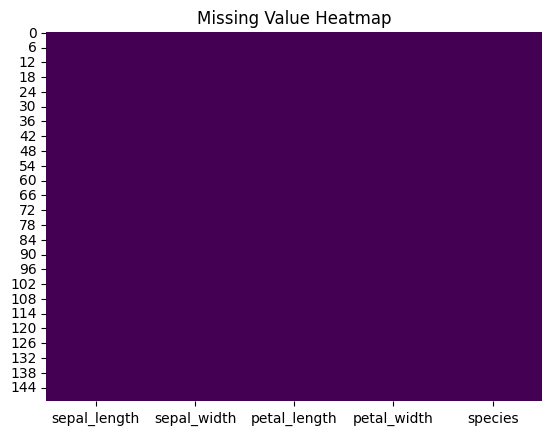

In [6]:
# Check for missing values
print("Missing Values per Column:")
print(iris_data.isnull().sum())
# Visualize missing values
sns.heatmap(iris_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

## Visualize potential outliers using box plots ##

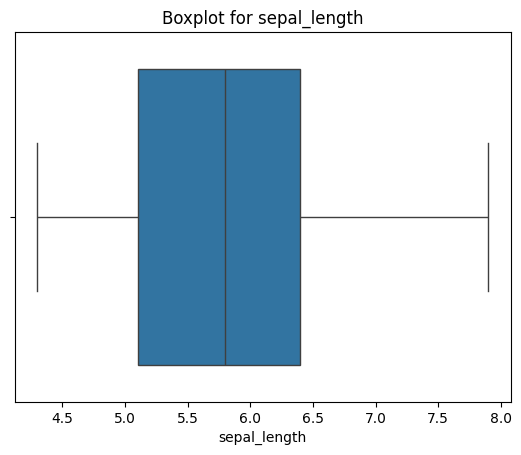

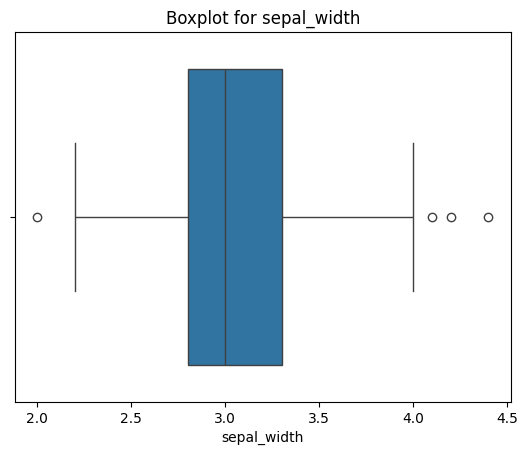

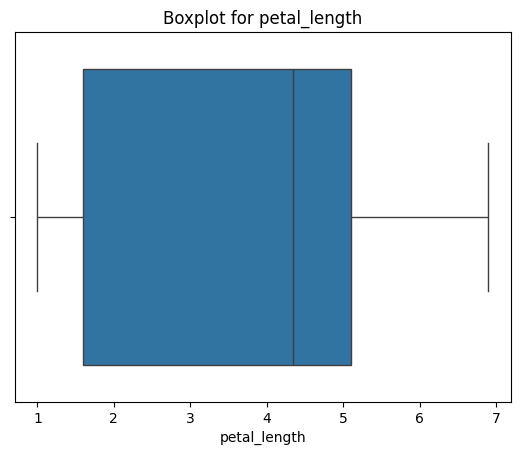

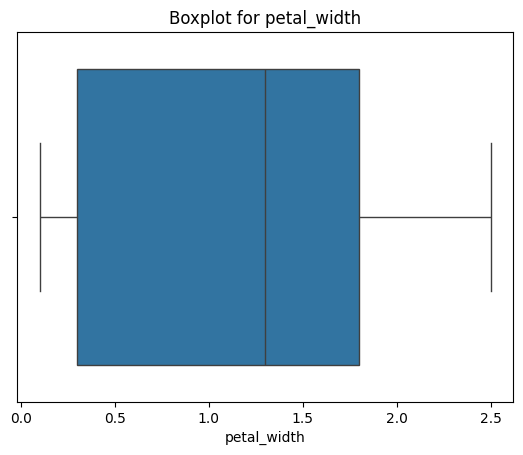

In [7]:
numeric_columns = iris_data.select_dtypes(include=["float64", "int64"]).columns

for column in numeric_columns:
    sns.boxplot(x=iris_data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

## Check skewness for numeric columns 

In [8]:

from scipy.stats import skew

for column in numeric_columns:
    skewness = skew(iris_data[column], nan_policy="omit")  
    print(f"Skewness for {column}: {skewness}")

Skewness for sepal_length: 0.3117530585022963
Skewness for sepal_width: 0.330702812773315
Skewness for petal_length: -0.2717119501716388
Skewness for petal_width: -0.10394366626751729


In [9]:
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
type(iris_data)

pandas.core.frame.DataFrame

In [11]:
iris_data.iloc[50 :100]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [12]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
sns.pairplot(iris_data,hue="species")
plt.show()

In [16]:
x= iris_data.drop("species",axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y =iris_data["species"]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale features

In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # scaler = StandardScaler()
# # scaled_features = scaler.fit_transform(iris_data[numeric_columns])

# # # Convert back to a DataFrame
# # df_scaled = pd.DataFrame(scaled_features, columns=numeric_columns)
# # print(df_scaled.head())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Define a pipeline
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # First step: scaling the data
        (
            "knn",
            KNeighborsClassifier(n_neighbors=5),
        ),  # Second step: training the k-NN model
    ]
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
# y_pred = knn.predict(X_test)
y_pred = pipeline.predict(X_test)

In [40]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 1.0


In [35]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [36]:
X_test.head()


,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [37]:
new_data = pd.DataFrame({"sepal_length":[6.7],"sepal_width":[6.5],"petal_length":[3.4],"petal_width":[2.9]})
prediction = knn.predict(new_data)
prediction[0]

c:\Users\mayov\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


'Iris-virginica'

In [41]:
import joblib
# Save the trained pipeline (which includes the scaler and the model)
joblib.dump(pipeline, "iris_knn_model.pkl")

['iris_knn_model.pkl']